# Strategic Assignment
## Assignment Title: CA 2

Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading dataset (Housing.csv)

In [2]:
df = pd.read_csv("Housing.csv")

Reading first few rows.

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Determining shape of dataset

In [4]:
df.shape

(545, 13)

Using 'df.info()' to display basic information about the dataset, including the data types and missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Since there are no missing values so no need to deal with them in preprocessing.

Using df.describe() to generate descriptive statistics for numerical columns, including count, mean, std (standard deviation), min, and max.

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


 Use this to generate summary statistics for categorical columns.

In [7]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


## Visualizations

1. Correlation Matrix

<ipython-input-8-53e1dd536547>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


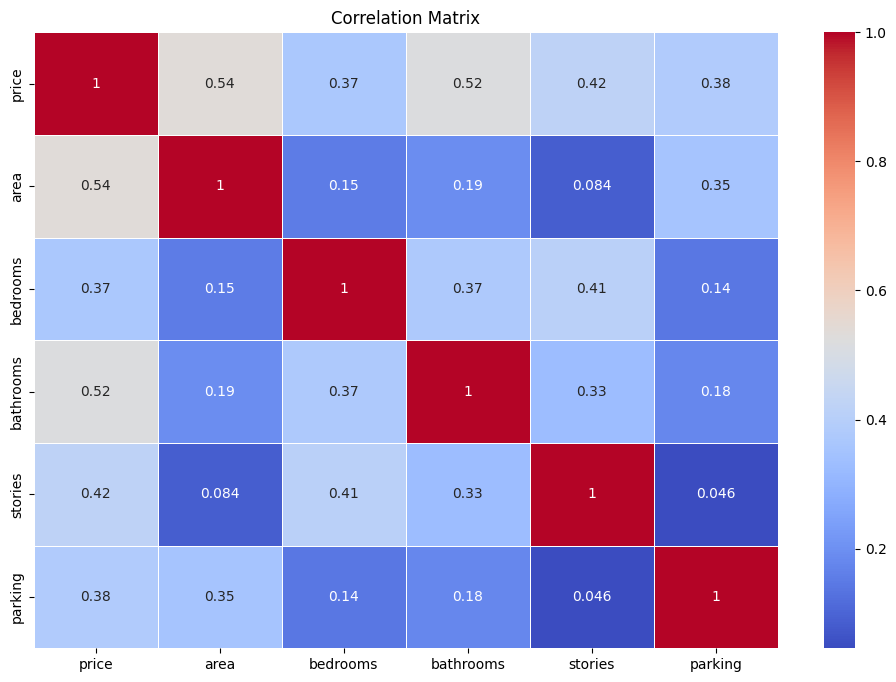

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

This Correlation matrix drawn as heatmap displays the correlation coefficients between variables, allowing to assess the strength and dependency of these relationships.

2. Scatter Plot

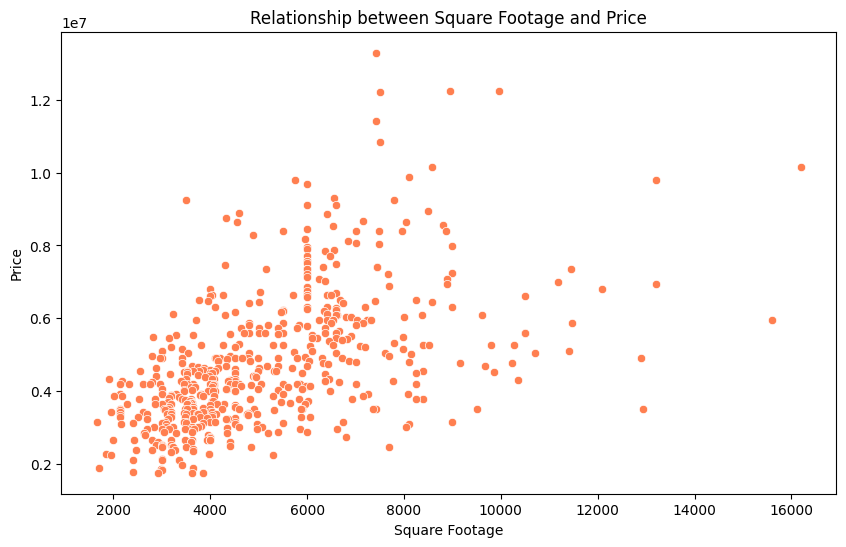

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, color='coral')
plt.title('Relationship between Square Footage and Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

The scatter plot showcases the distribution of square footage in the dataset and allows you to observe how house prices are distributed within different square footage ranges.

3. Histogram

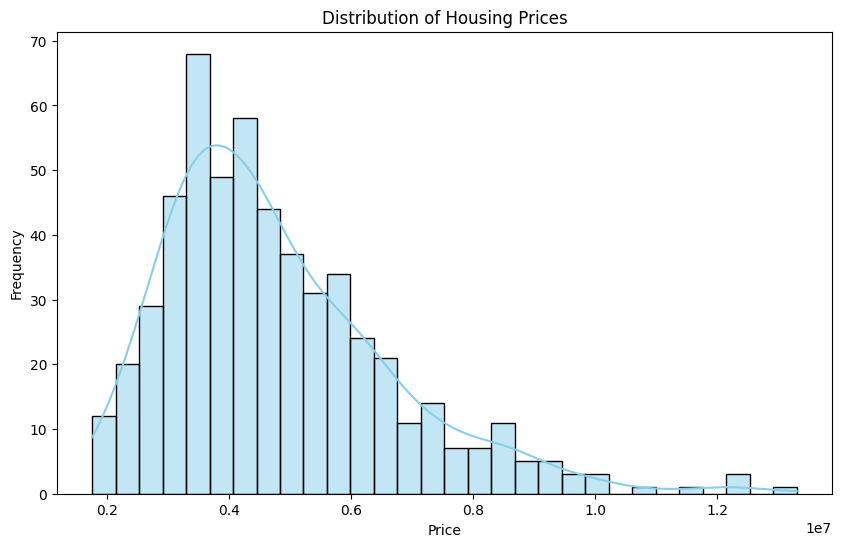

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The bars represent the frequency of houses falling into different price ranges, providing insights into the overall distribution pattern and potential outliers in the 'price' variable. This is our target variable as well.

### Label Encoding
Here "Label encoding" has been applied to convert all of the categorical columns into numerical format, facilitating their use in the regression analysis.

In [11]:
le = LabelEncoder()

# List of columns to labelly encode
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## Machine Learning Model
### Regression Analysis
### Linear Regression Model

Separate target variable in (y) and rest of the features of dataset in (X)

In [13]:
X = df.drop('price', axis=1)
y = df['price']

Splitting the dataset into training and testing data with 80-20 percentage ratio.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialization

In [15]:
model = LinearRegression()

Training the model

In [16]:
model.fit(X_train, y_train)

LinearRegression()

Making predictions on the test data

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([5203691.70963178, 7257004.02115475, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491253, 5788125.92515322,
       4768370.18154076, 4391684.04193171, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.1194117 , 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

Evaluation of model using evaluation metrics

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1771751116594.0352
R-squared: 0.6494754192267803


The large MSE suggests that the model's predictions deviate significantly from the actual values while
the R-squared value of 0.65 indicates that the model explains a moderate amount of the variability in housing prices, leaving room for improvement.

Visualizing the performance of model using Scatter plot for actual vs predicted prices (predicted by the model).

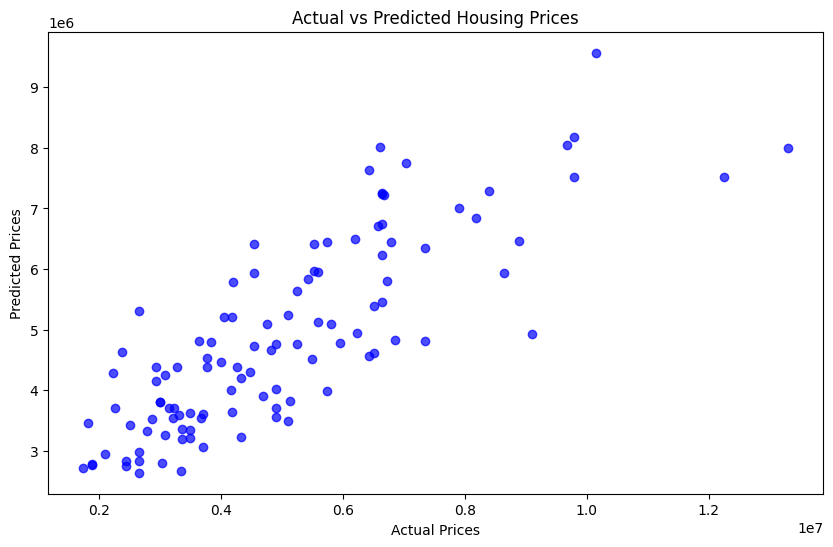

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

The results can be seen.